In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# drop the CustomerID column
df = df.drop('customerID',axis=1)

In [6]:
# convert the TotalCharges column to float 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# null count 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# replace null with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median)

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# duplicate check 
df.duplicated().sum()

22

In [11]:
# drop the duplicates
df.drop_duplicates(inplace=True,ignore_index=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [13]:


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [14]:
# value counts of categorical columns
for i in df.columns:
    if df[i].dtype == "object":
        print(f"Value counts for {i}")
        print(df[i].value_counts())
        print("--------------------")

Value counts for gender
gender
Male      3541
Female    3480
Name: count, dtype: int64
--------------------
Value counts for Partner
Partner
No     3619
Yes    3402
Name: count, dtype: int64
--------------------
Value counts for Dependents
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
--------------------
Value counts for PhoneService
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
--------------------
Value counts for MultipleLines
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------
Value counts for InternetService
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
--------------------
Value counts for OnlineSecurity
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
--------------------
Value counts for OnlineBackup
OnlineBackup
No                  

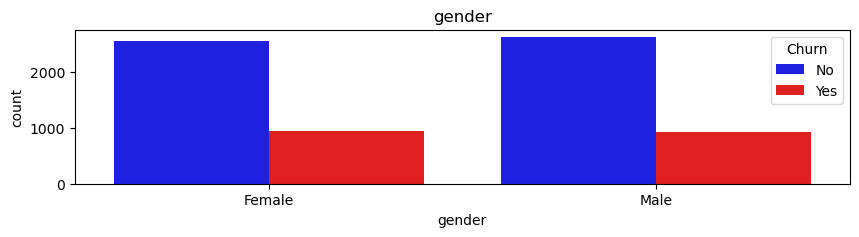

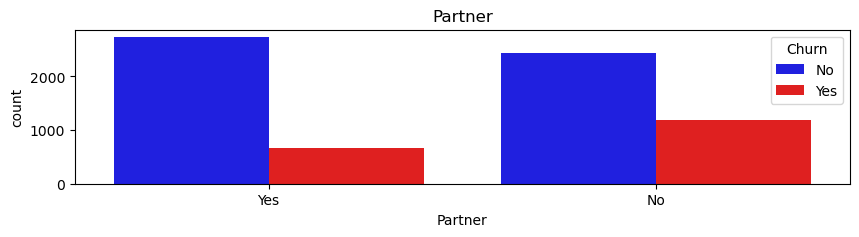

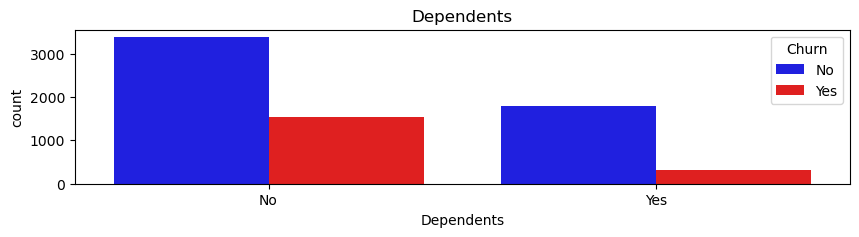

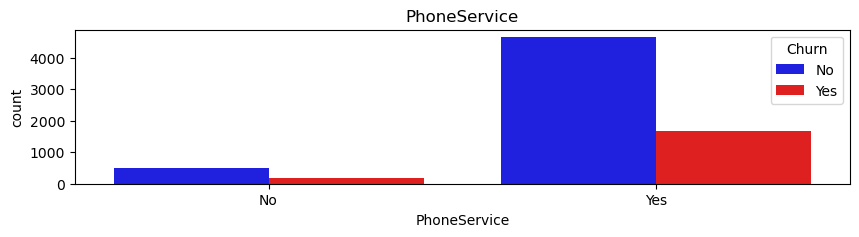

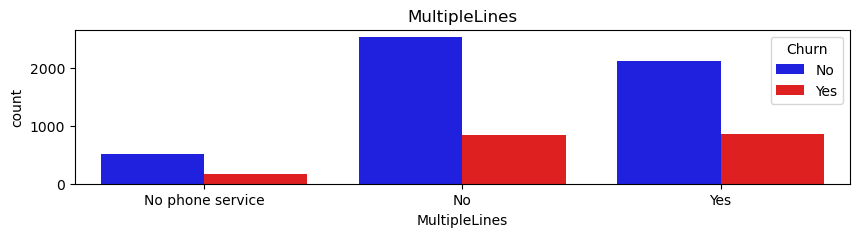

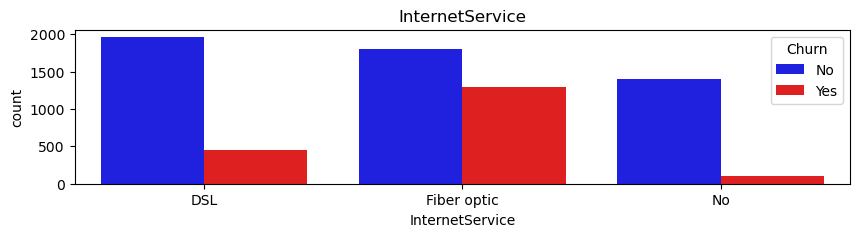

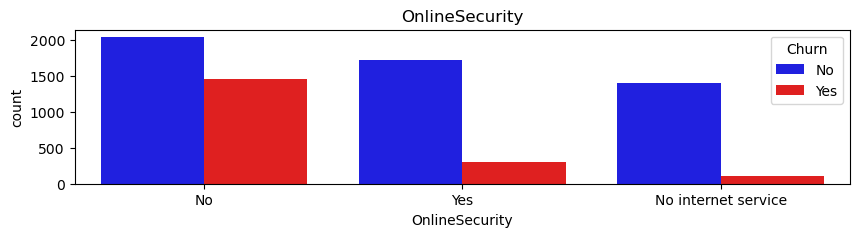

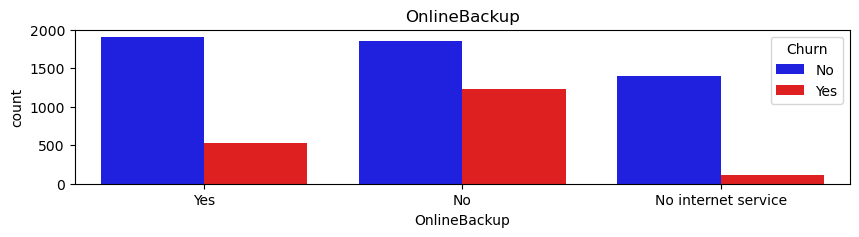

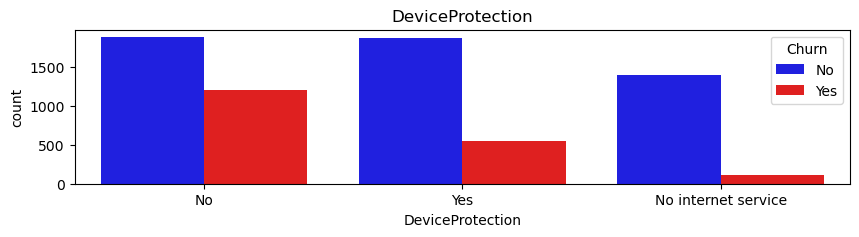

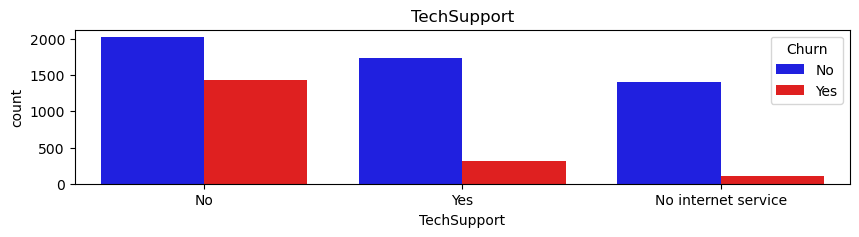

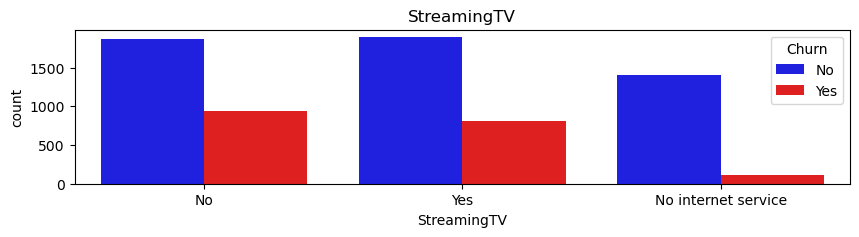

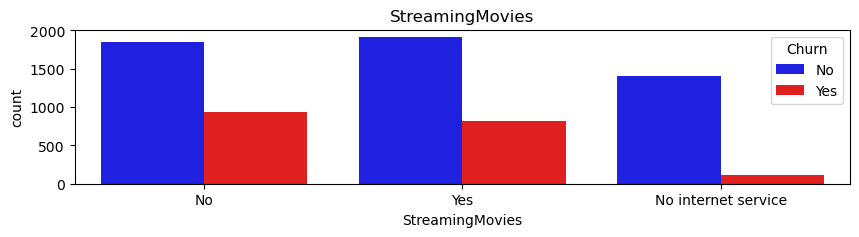

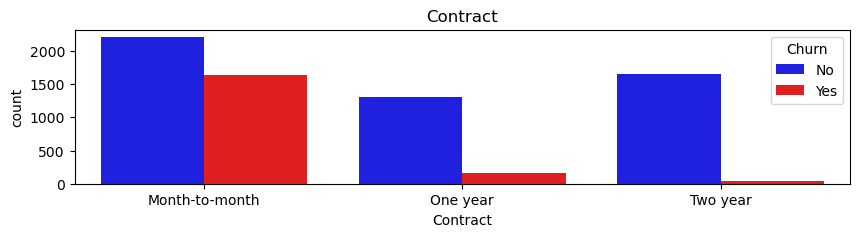

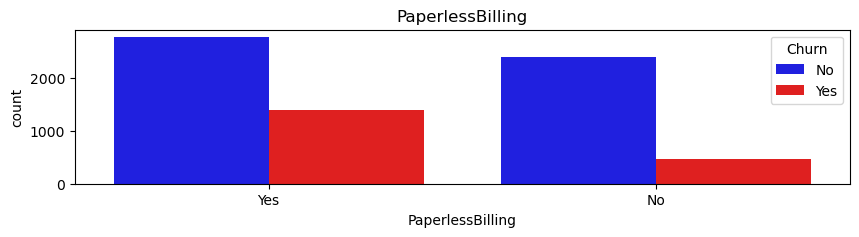

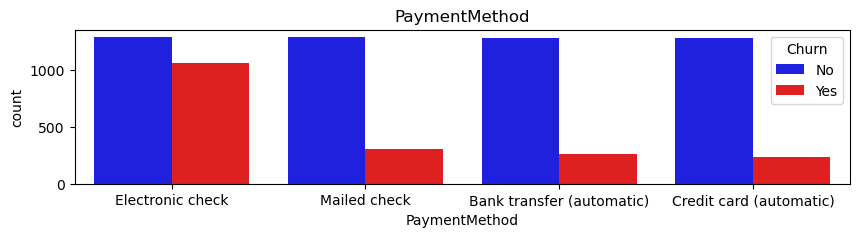

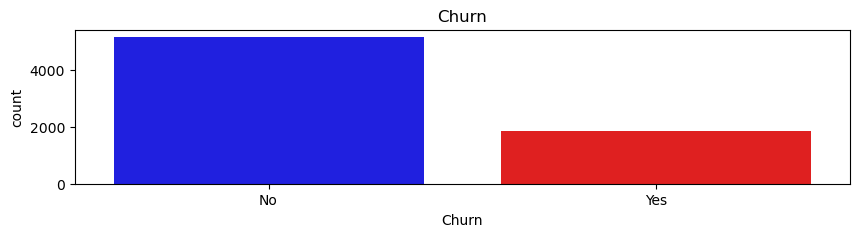

In [15]:
# visualization
colors = {"Yes":"red","No":"blue"}

palette = {0:"blue",1:"red"}

for i,predictor in enumerate(df.select_dtypes(include="object")):
    plt.figure(i,figsize=(10,2))
    sns.countplot(data=df,x=predictor,hue="Churn",palette=colors)
    plt.title(predictor)
    plt.show()

<Axes: ylabel='Churn'>

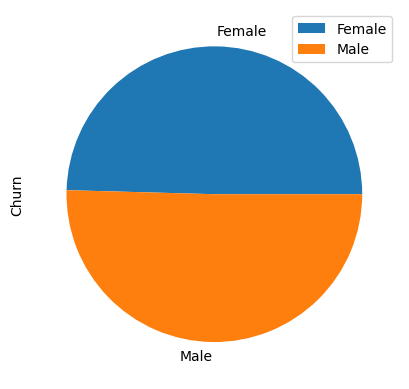

In [16]:
df.groupby('gender')['Churn'].count().plot(kind="pie",legend=True)

<Axes: ylabel='Churn'>

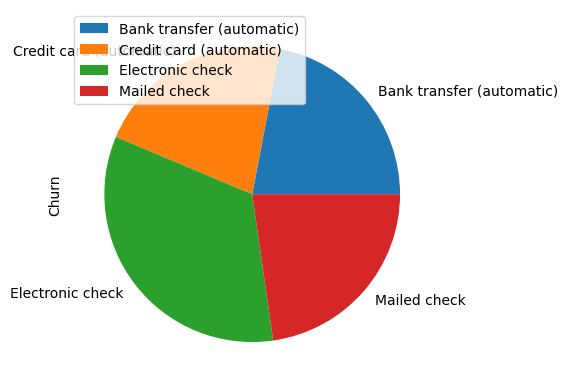

In [17]:
df.groupby('PaymentMethod')['Churn'].count().plot(kind="pie",legend=True)

<Axes: ylabel='Frequency'>

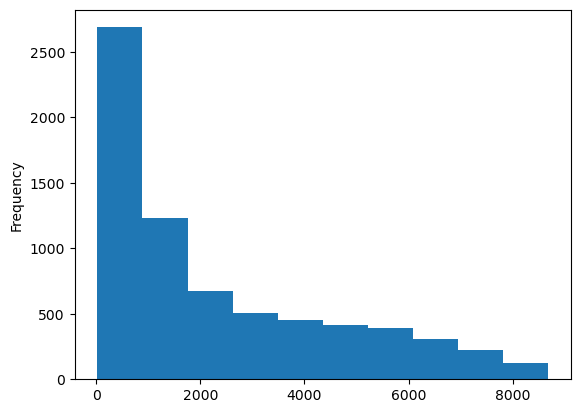

In [18]:
df['TotalCharges'].plot(kind="hist")

In [19]:
numeric_df = df.select_dtypes(exclude="object")

In [20]:
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7016,0,24,84.80,1990.50
7017,0,72,103.20,7362.90
7018,0,11,29.60,346.45
7019,1,4,74.40,306.60


In [21]:
cat_df = df.select_dtypes(include="object")

In [22]:
cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7017,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7018,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7019,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [23]:
y = cat_df['Churn']
cat_df = cat_df.drop("Churn",axis = 1)

In [24]:
X = pd.concat([cat_df,numeric_df],axis=1)

In [25]:
# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [26]:
cat_cols = cat_df.columns.tolist()
num_cols = numeric_df.columns.tolist()

In [27]:
# Preprocessing Pipeline 
preprocess = ColumnTransformer(
              transformers=[
                  ("ohe",OneHotEncoder(handle_unknown="ignore"),cat_cols),
                  ("scale",StandardScaler(),num_cols)
              ]
)

In [46]:
# model pipeline
pipe = Pipeline(
    [
        ("prep",preprocess),
        ("model",SVC(class_weight="balanced",kernel="rbf"))
    ]
)

In [47]:
X_train = X_train.fillna(0) 
X_test = X_test.fillna(0)

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('scale', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', SVC(class_weight='balanced'))])

In [49]:
y_pred  = pipe.predict(X_test)

In [50]:
print("Baseline Model Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Baseline Model Results
[[1147  403]
 [ 114  443]]
              precision    recall  f1-score   support

          No       0.91      0.74      0.82      1550
         Yes       0.52      0.80      0.63       557

    accuracy                           0.75      2107
   macro avg       0.72      0.77      0.72      2107
weighted avg       0.81      0.75      0.77      2107



In [33]:
# hyperparameter tuning
params = {
    "model__kernel": ["rbf"],
    "model__C": [0.5, 1, 2, 5, 10],
    "model__gamma": ["scale", 0.01, 0.001]
}



grid = GridSearchCV(estimator=pipe,param_grid=params,scoring="f1",
                    cv = 5,n_jobs=-1,verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('model',
                                        SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 2, 5, 10],
                         'model__gamma': ['scale', 0.01, 0.001],
                         'model__kernel': ['rbf']},
             scoring='f1', verbose=3)

In [34]:
grid_pred = grid.predict(X_test)

In [35]:
print("Grid Model Results")
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

Grid Model Results
[[1138  412]
 [ 112  445]]
              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1550
         Yes       0.52      0.80      0.63       557

    accuracy                           0.75      2107
   macro avg       0.71      0.77      0.72      2107
weighted avg       0.81      0.75      0.76      2107



In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,grid_pred))

0.7513051732320836


In [37]:
X_train

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
817,Female,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0,55,103.70,5656.75
1791,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,0,19,89.65,1761.05
5222,Female,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,0,8,101.15,842.90
1016,Female,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0,64,24.40,1601.20
4480,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0,1,19.75,19.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,Male,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,Yes,One year,No,Bank transfer (automatic),0,26,78.95,2034.25
6678,Male,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,No,Electronic check,0,5,96.55,500.10
2089,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0,18,19.65,391.70
6861,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,One year,Yes,Credit card (automatic),1,71,99.65,7181.25


In [52]:
# saving the model

import joblib
joblib.dump(pipe, "model.pkl")

['model.pkl']

In [39]:
y_test

1746     No
4143     No
5409     No
7009     No
6439     No
       ... 
1953     No
156      No
6464    Yes
4309     No
3728     No
Name: Churn, Length: 2107, dtype: object

In [40]:
grid_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [41]:
X_train.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
817,Female,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0,55,103.70,5656.75
1791,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,0,19,89.65,1761.05
5222,Female,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,0,8,101.15,842.90
1016,Female,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0,64,24.40,1601.20
4480,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0,1,19.75,19.75


In [42]:
print(type(joblib.load("grid_model.pkl")))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [ ]:
pipe.

<bound method Pipeline.get_params of Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
        